# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* At the end of the extract phase, 

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pip install plotly

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

Section 1 content

In [ ]:
pip install pingouin nbformat

---

# Section 2

Section 2 content

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
for col in df.select_dtypes(include=["object"]).columns:
    print(df[col].shape)
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 40)

(1470,)
Column: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------
(1470,)
Column: BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------
(1470,)
Column: Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------
(1470,)
Column: EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------
(1470,)
Column: Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------------
(1470,)
Column: JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laborat

In [4]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Unique values (sample): {df[col].unique()[:10]}")
    print("-" * 40)

Column: Age
  Data type: int64
  Unique values (sample): [41 49 37 33 27 32 59 30 38 36]
----------------------------------------
Column: Attrition
  Data type: object
  Unique values (sample): ['Yes' 'No']
----------------------------------------
Column: BusinessTravel
  Data type: object
  Unique values (sample): ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Column: DailyRate
  Data type: int64
  Unique values (sample): [1102  279 1373 1392  591 1005 1324 1358  216 1299]
----------------------------------------
Column: Department
  Data type: object
  Unique values (sample): ['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
Column: DistanceFromHome
  Data type: int64
  Unique values (sample): [ 1  8  2  3 24 23 27 16 15 26]
----------------------------------------
Column: Education
  Data type: int64
  Unique values (sample): [2 1 4 3 5]
----------------------------------------
Column: Education

### 1. Dataset Overview
Let's start by reviewing the shape and a sample of the employee attrition dataset.


In [15]:
print(f"Shape: {df.shape}")
df.head(10)

Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


This dataset contains employee records with various features related to attrition, demographics, and job details.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
(df == 0).sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

In [19]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [20]:
df.duplicated().sum()

np.int64(0)

**Assumptions:**
- Zero values in certain columns may be valid (e.g., no overtime, no stock options, etc.).
- If no duplicates or missing values are found, the dataset is ready for analysis.


In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


**Key findings from summary statistics:**
- Review age, years at company, and other numerical features for distribution.
- Check categorical features (e.g., Attrition, Department, Gender) for imbalance.


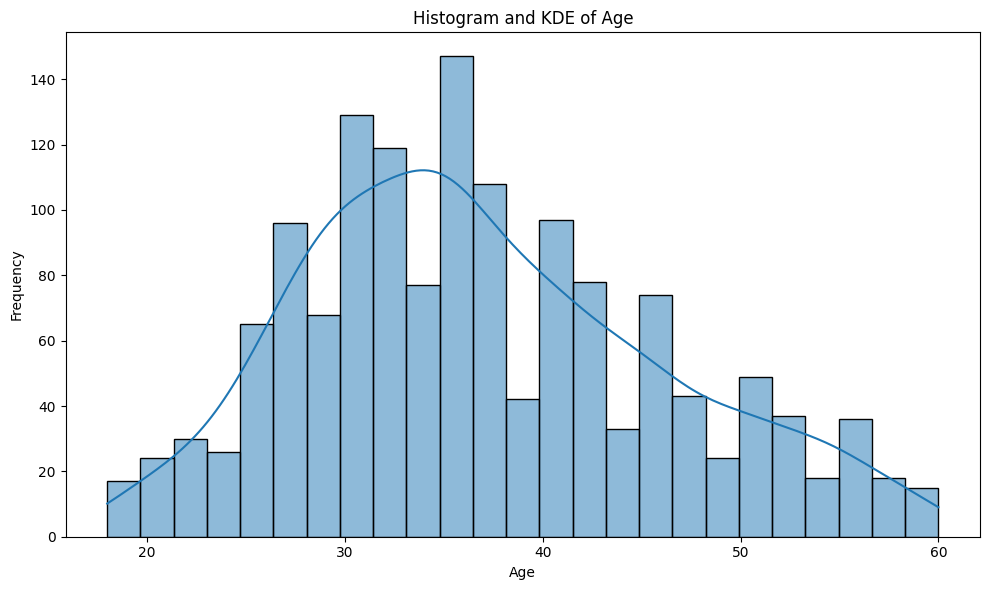

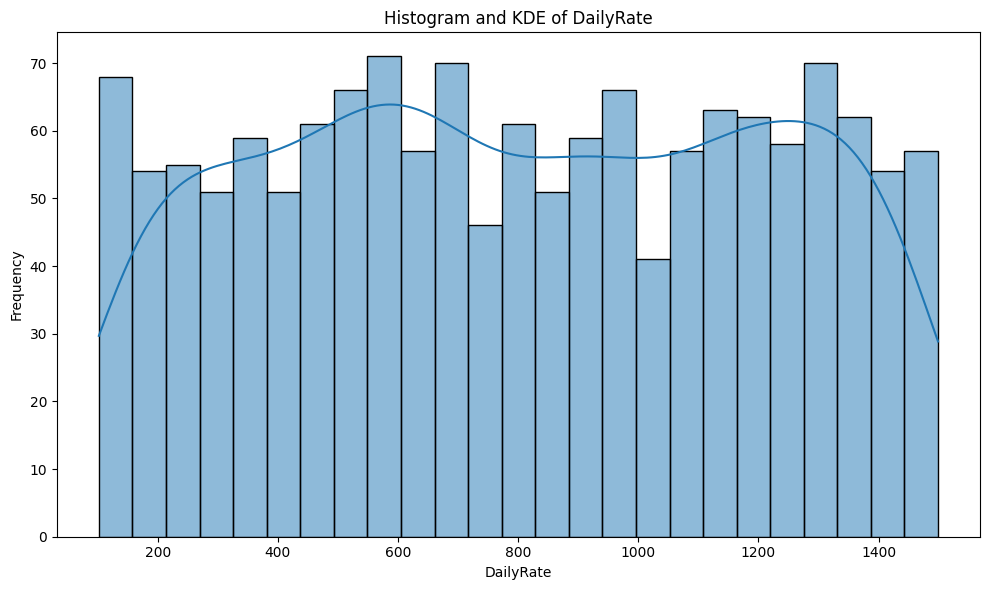

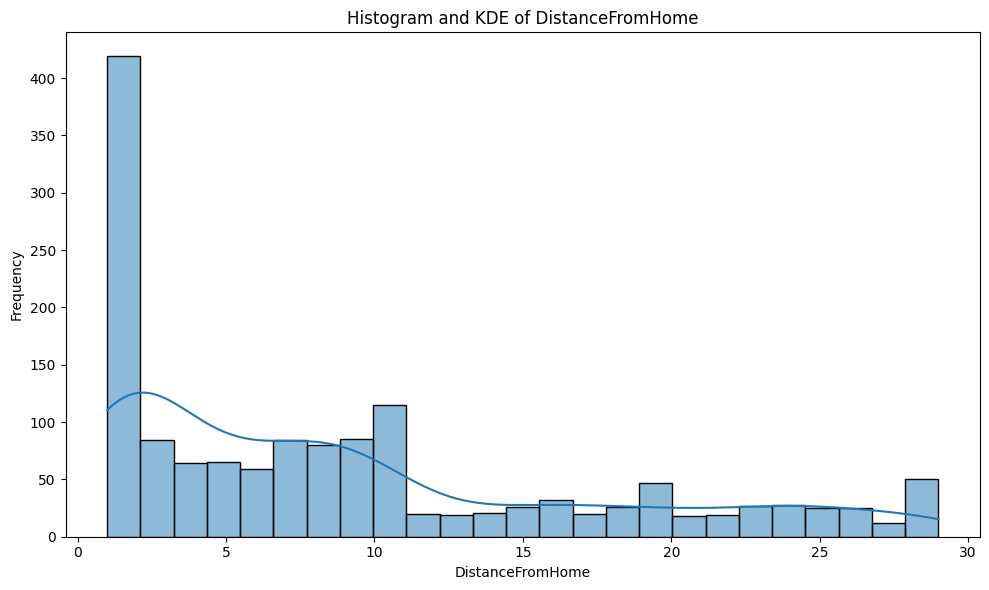

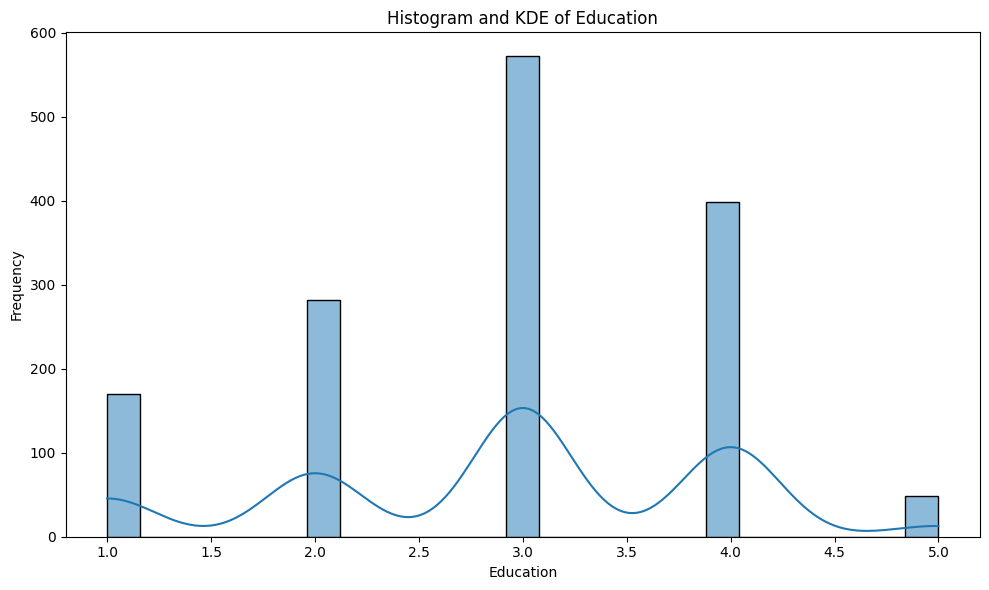

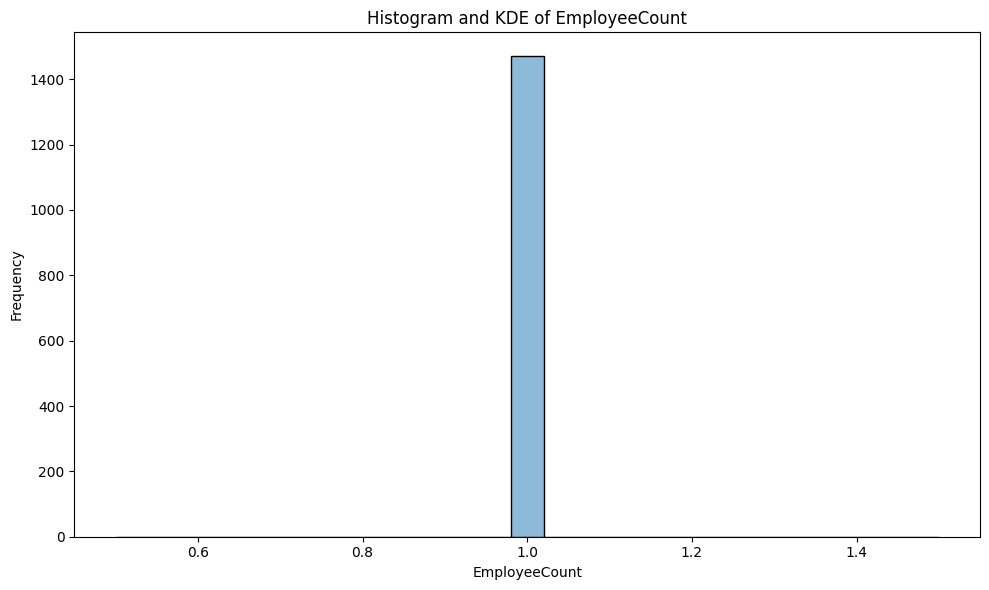

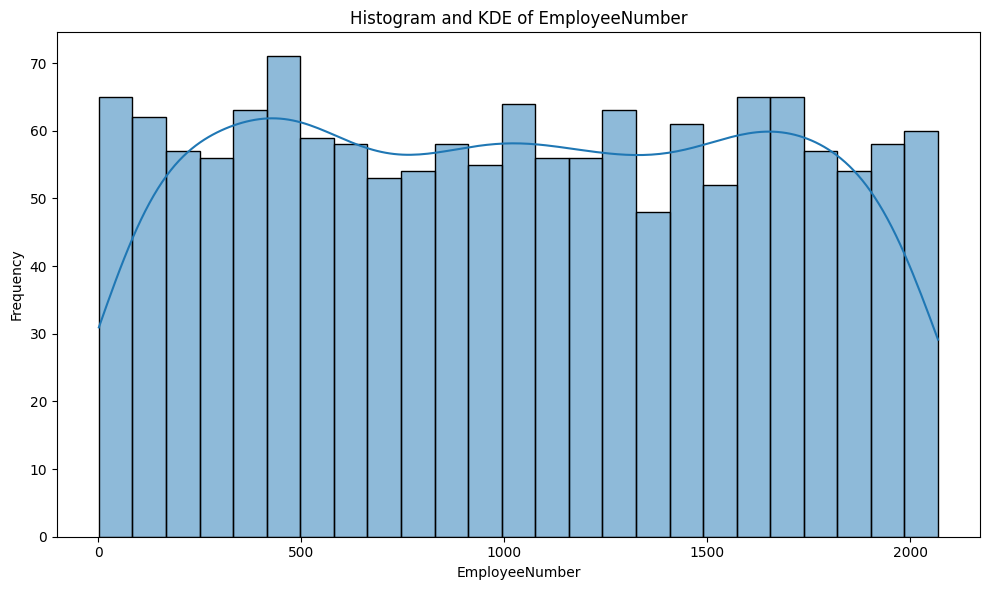

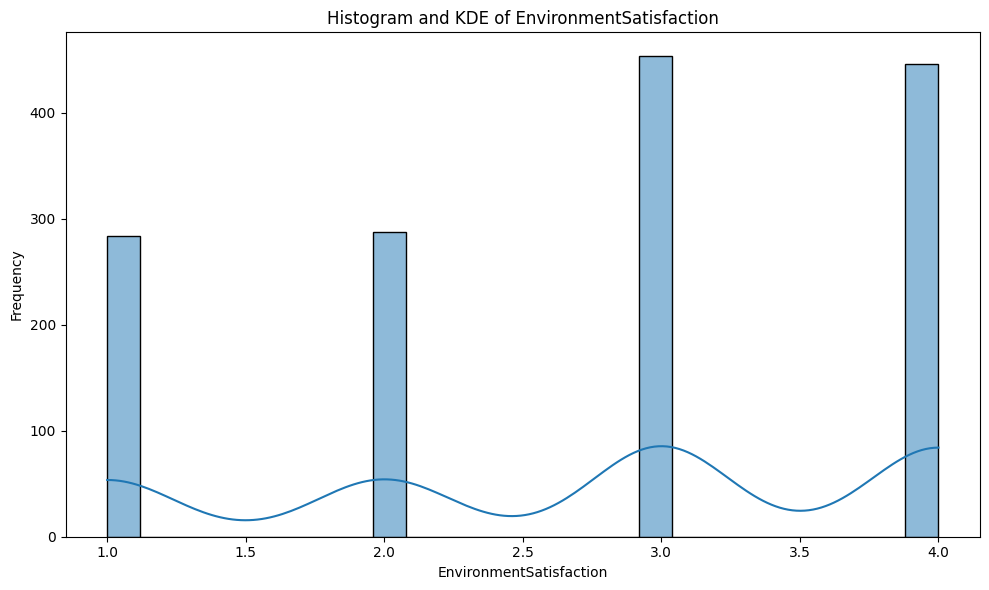

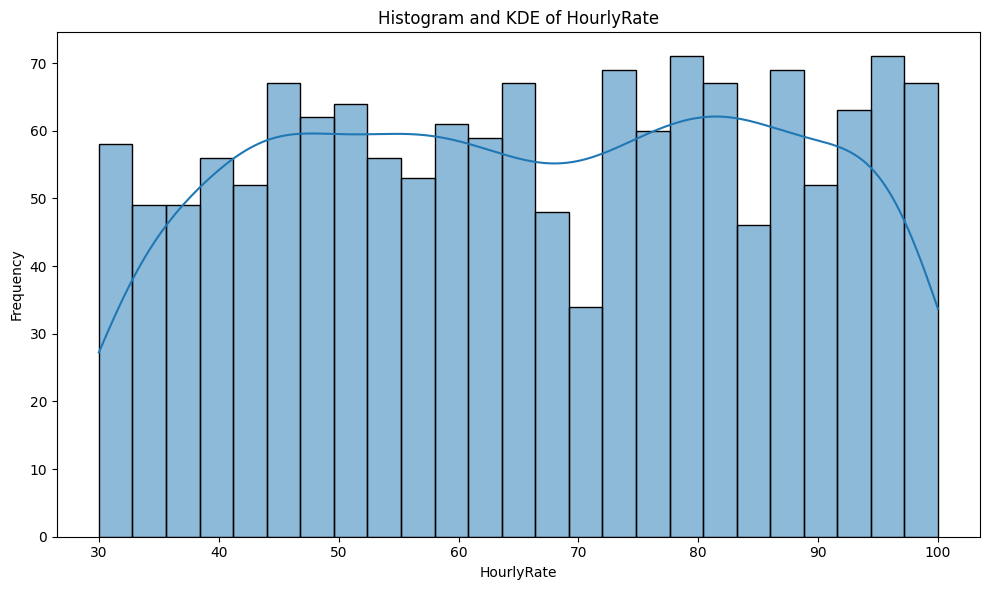

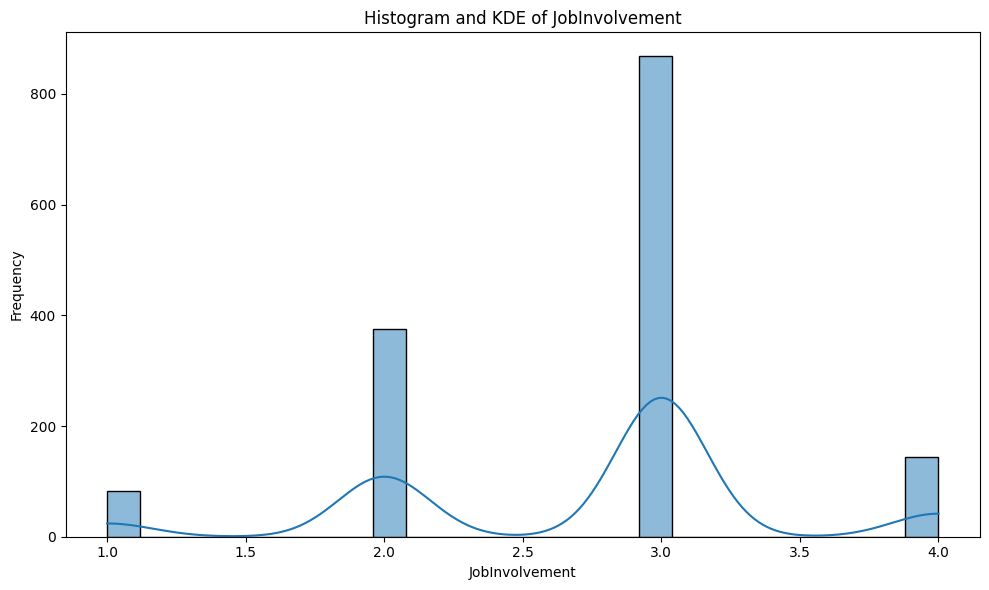

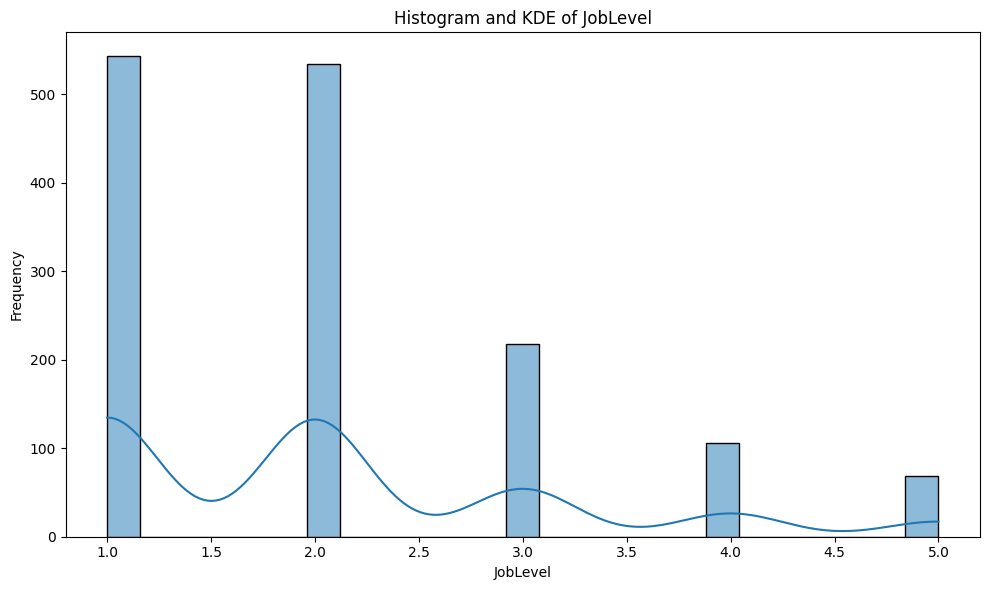

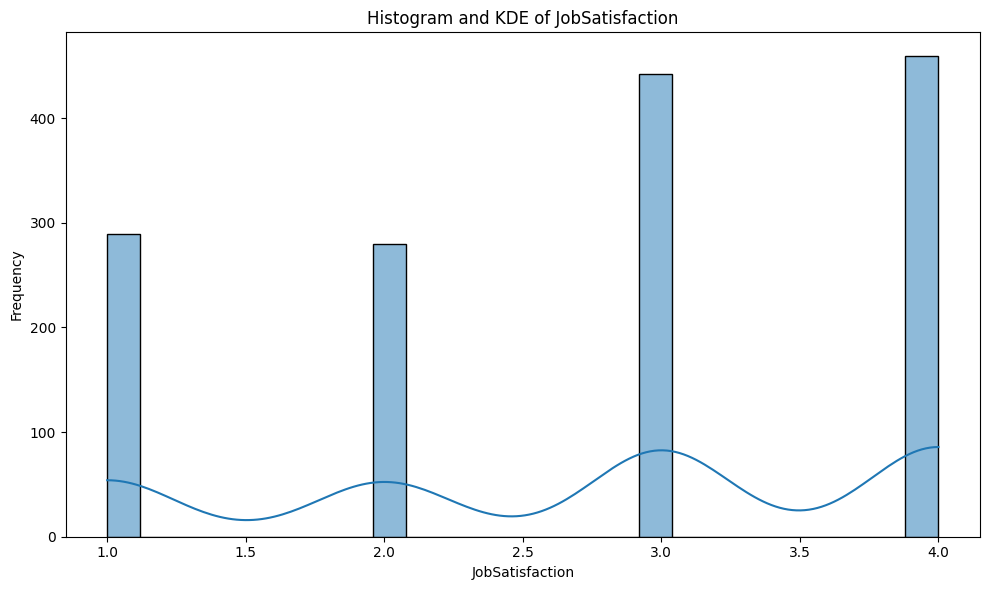

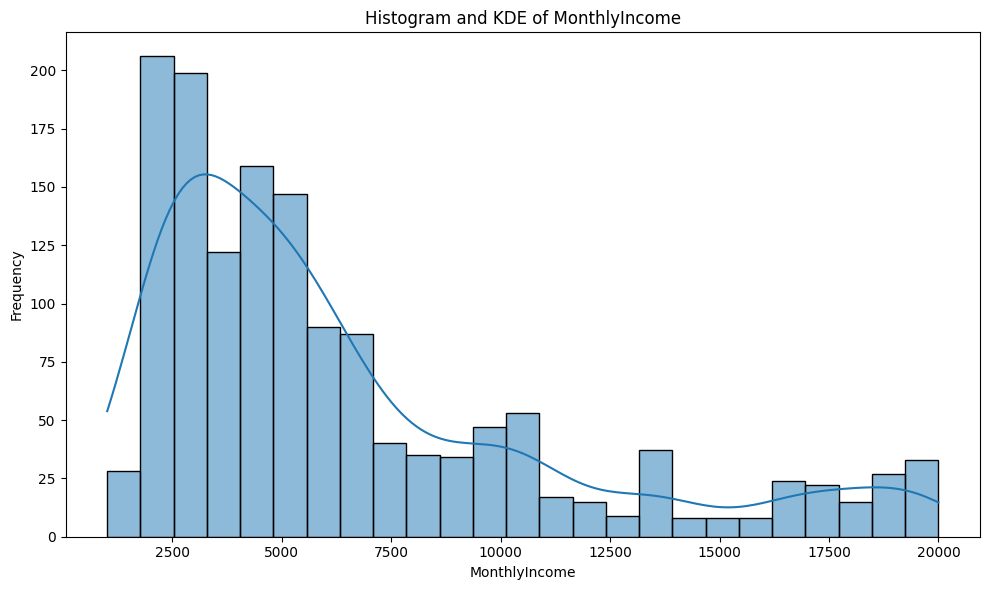

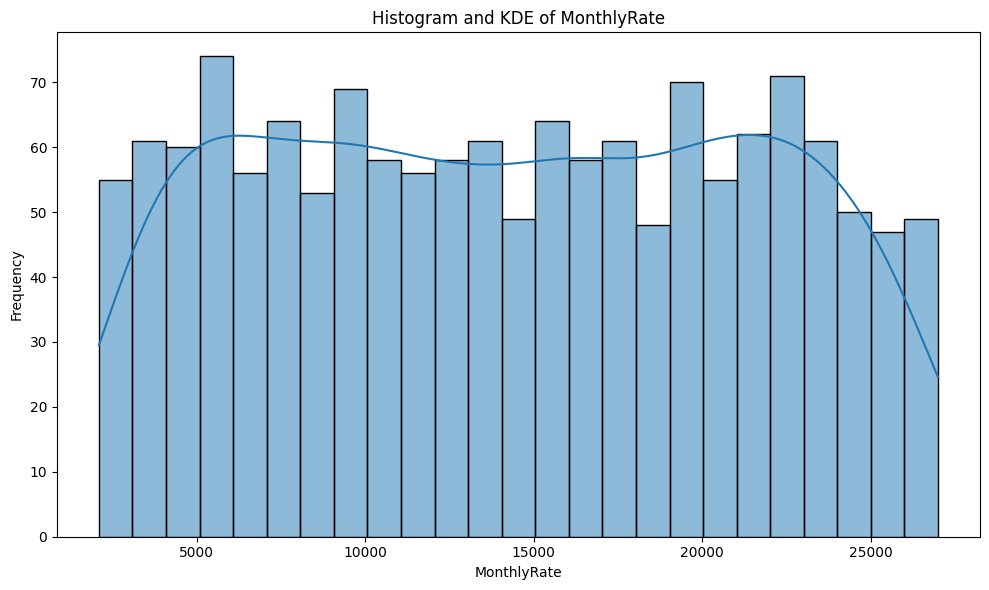

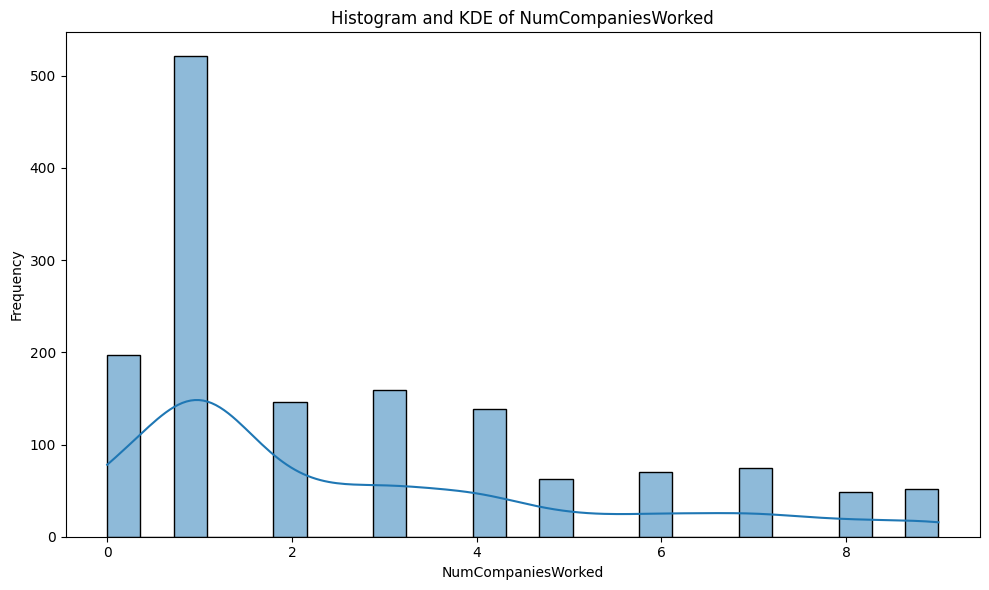

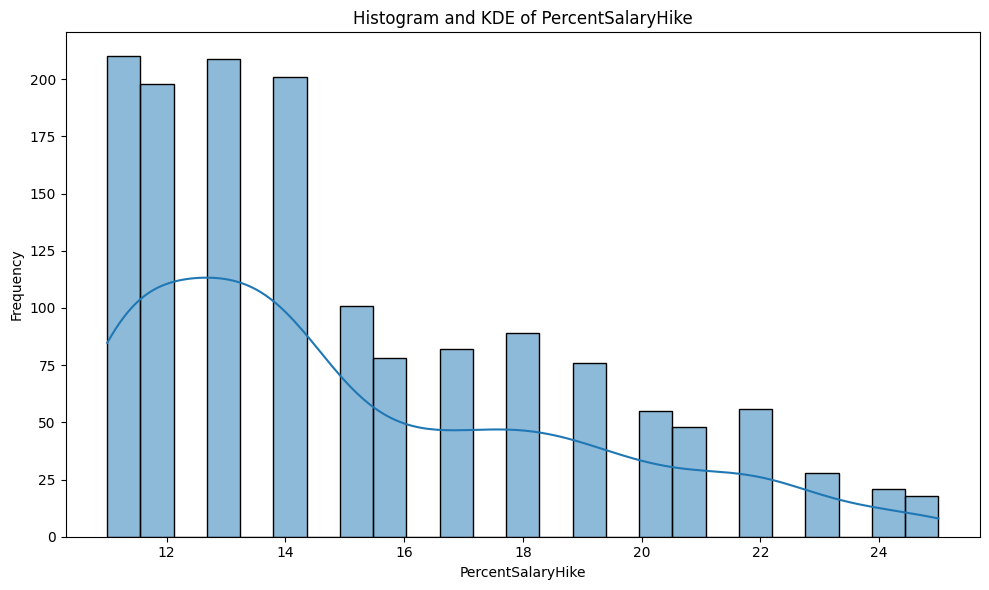

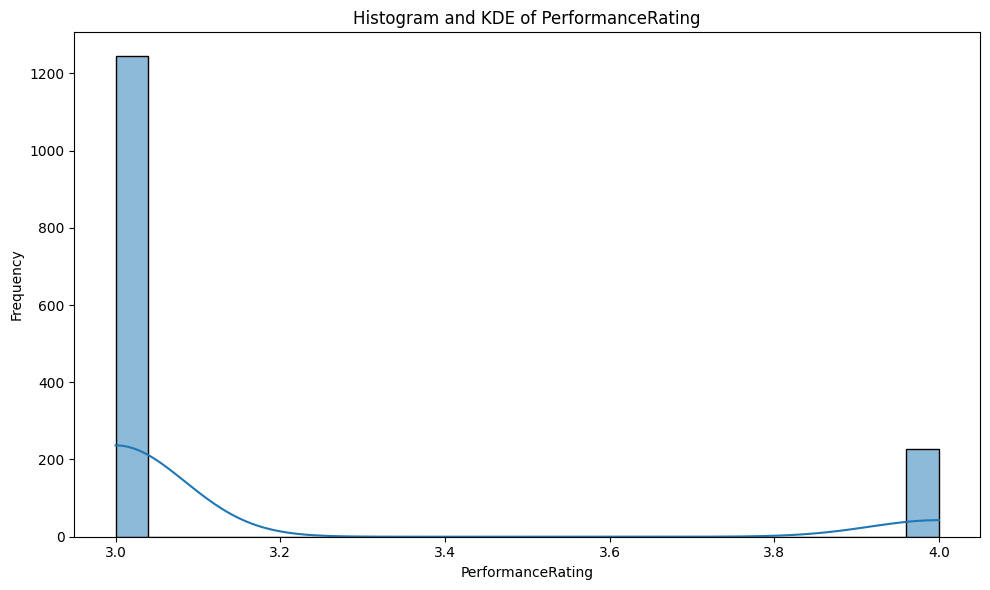

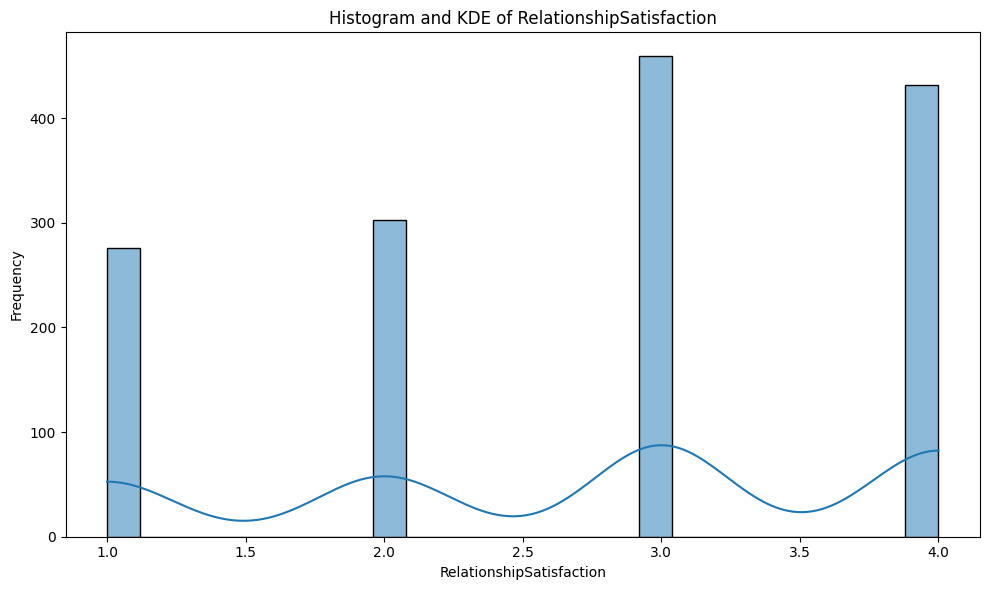

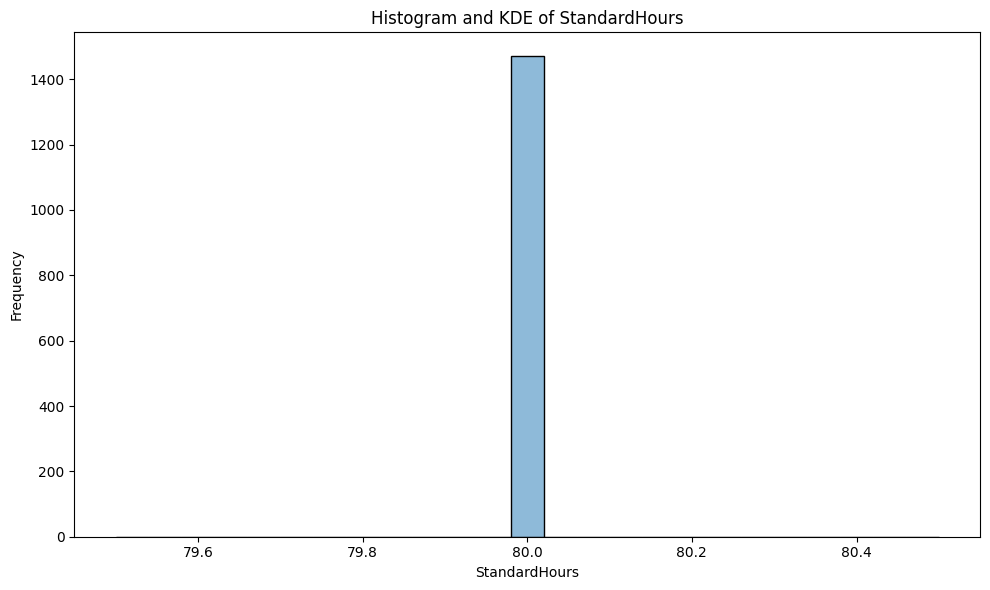

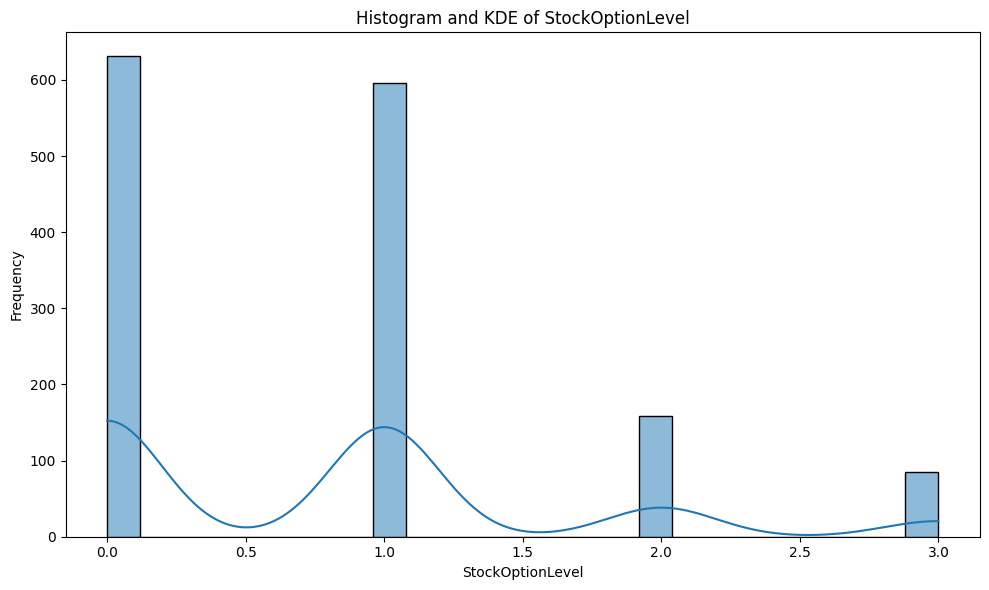

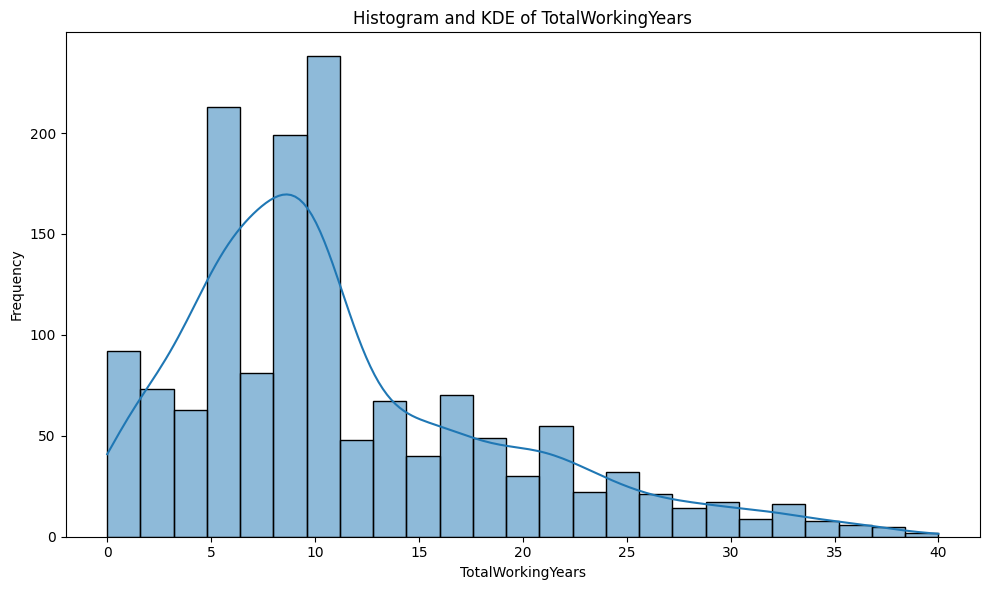

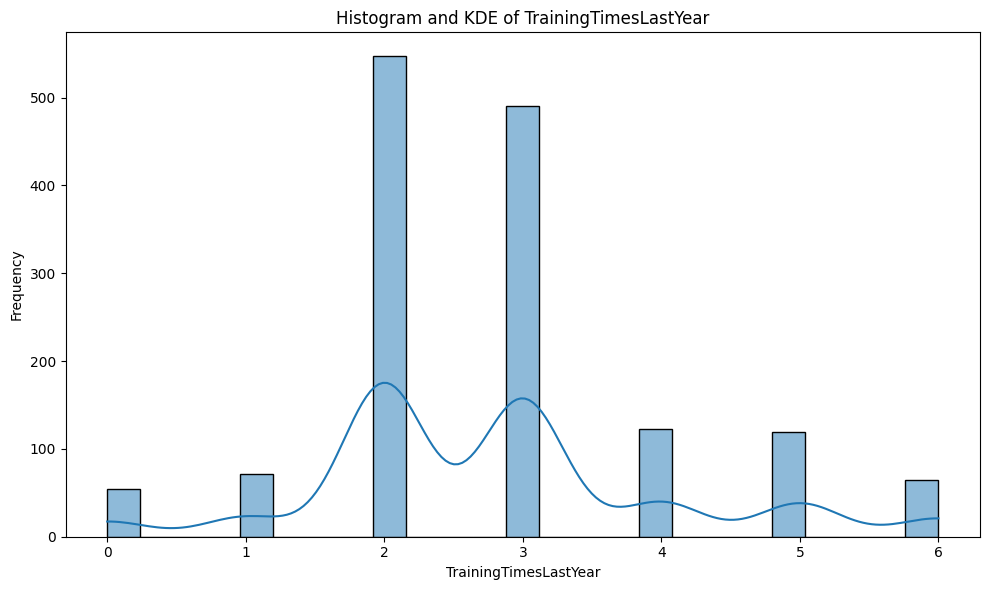

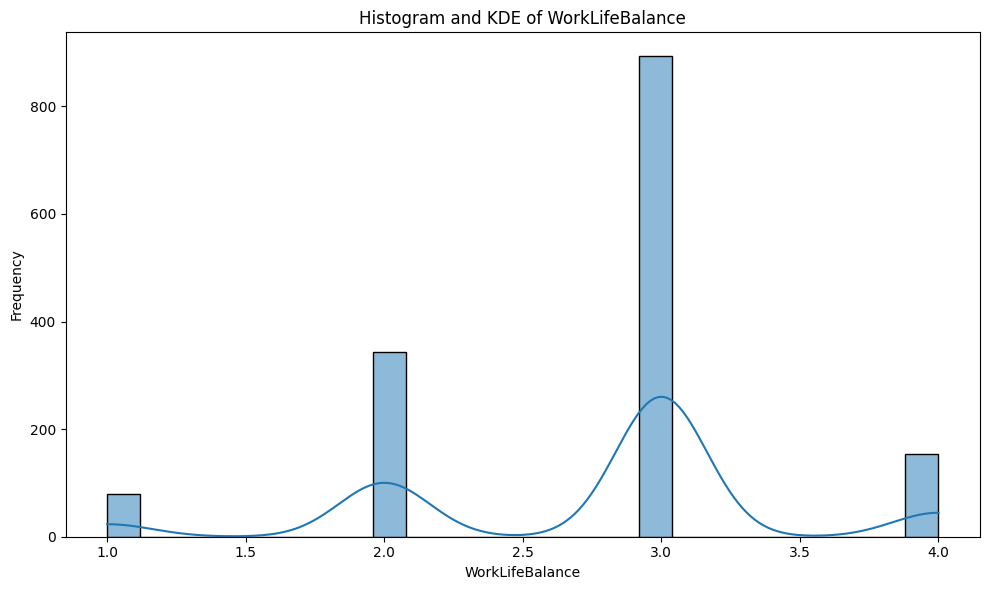

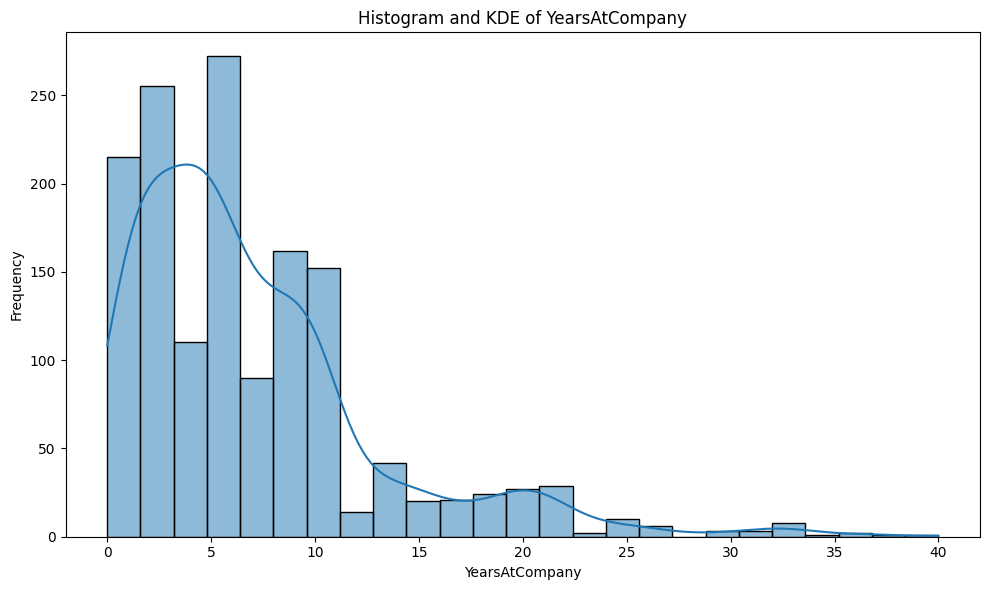

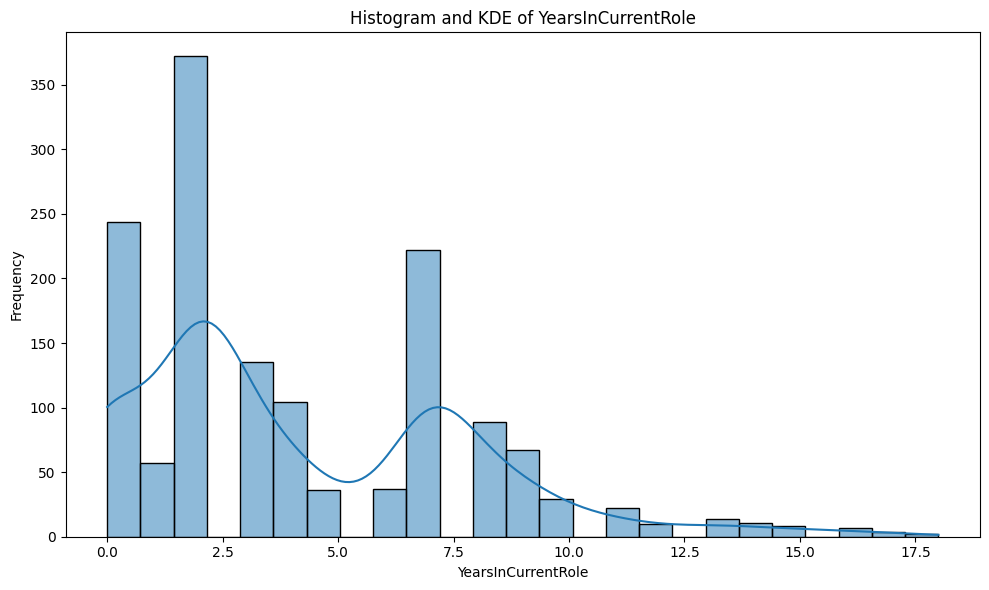

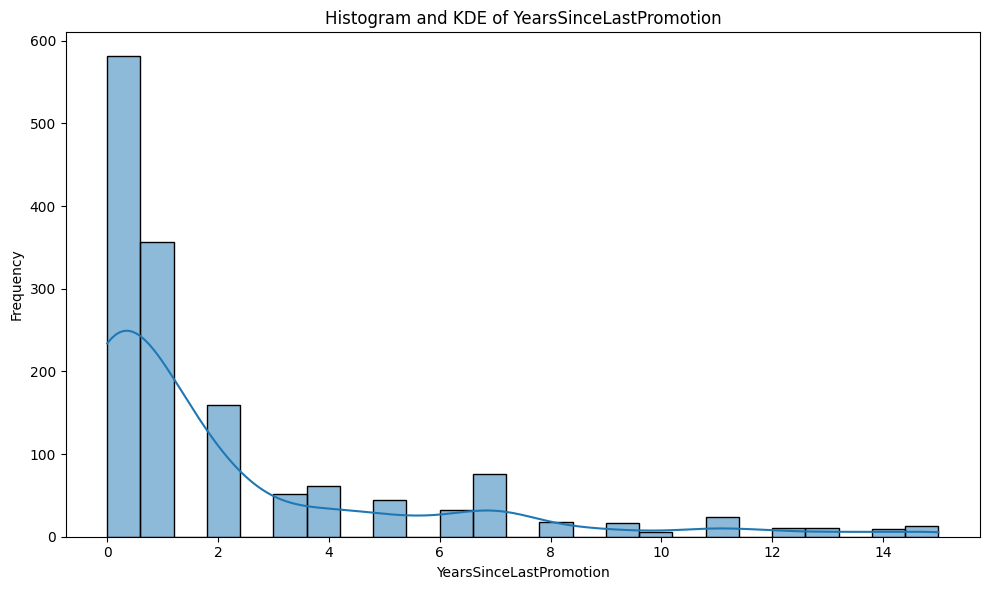

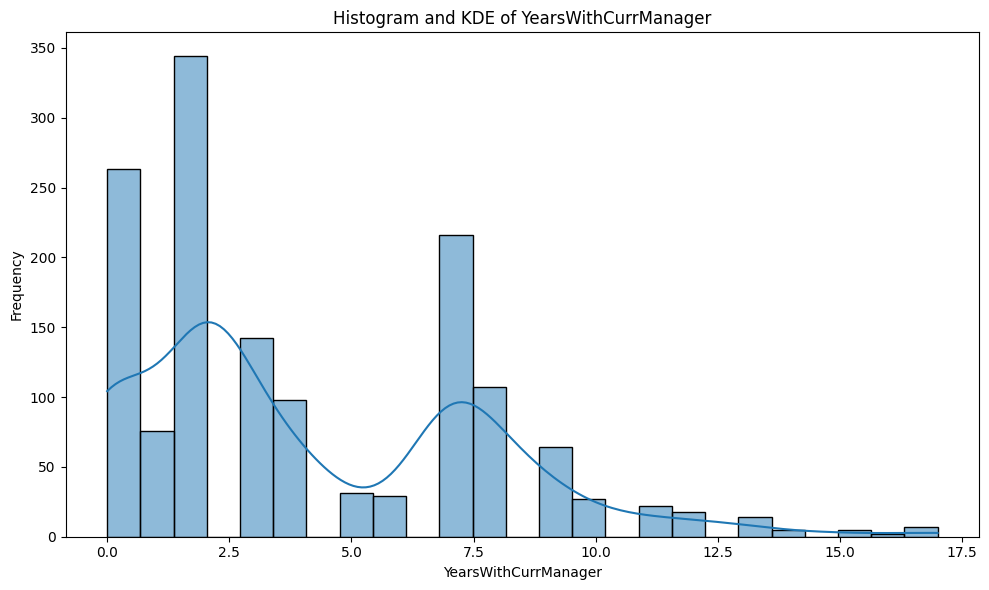

In [27]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=25, kde=True)
    plt.title(f"Histogram and KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Key observations:**
- Some categorical features may be imbalanced (e.g., Attrition, Department, Gender).
- Review for business implications, such as which departments have higher attrition rates.


In [38]:
for col in df.select_dtypes(include='object').columns:
    fig = px.histogram(df, x=col, nbins=25, title=f"Distribution of {col}")
    fig.update_layout(xaxis_title=col, yaxis_title="Frequency")
    fig.show()

**Key observations:**
- Numerical features may show skewness or outliers (e.g., MonthlyIncome, YearsAtCompany).
- These distributions help inform feature engineering and modeling choices.


In [29]:
for col in df.select_dtypes(include='number').columns:
    fig = px.box(df, x=col, title=f"Boxplot of {col}")
    fig.update_layout(xaxis_title=col)
    fig.show()

**Outlier analysis:**
- Boxplots help identify outliers in features such as MonthlyIncome, YearsAtCompany, etc.
- Outliers may be valid or may require further investigation.


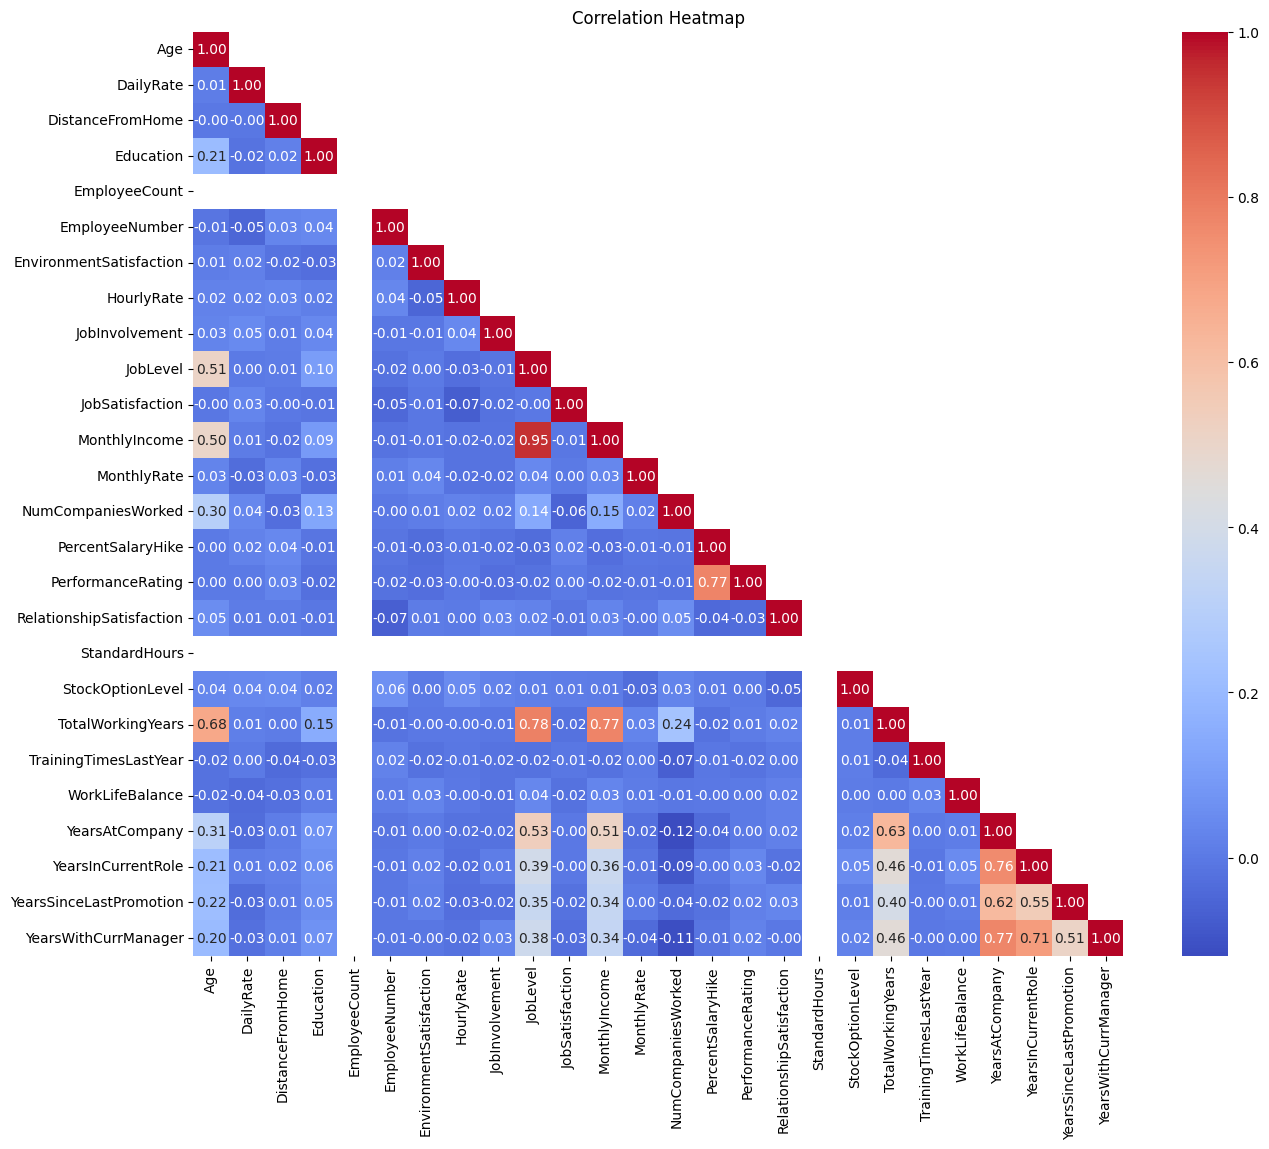

In [37]:
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(df.select_dtypes(include='number').corr(), dtype=bool), k=1)
sns.heatmap(df.select_dtypes(include='number').corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Correlation analysis:**
- The heatmap shows relationships between numerical features.
- Strong correlations may indicate redundancy or important relationships for modeling attrition.


In [39]:
pd.crosstab(df['Attrition'], df['Gender'], normalize='columns')

Gender,Female,Male
Attrition,,
No,0.852041,0.829932
Yes,0.147959,0.170068


---
### Summary of Findings
- The employee attrition dataset is clean and ready for analysis.
- Categorical and numerical features have been explored for distribution, imbalance, and outliers.
- Correlation analysis provides insight into feature relationships.

**Next steps:**
- Encode categorical features for modeling.
- Explore feature engineering and predictive modeling for attrition.


---
## Data Exploration & Analysis (Adapted from Synthetic Learning Behavior Analysis Extract)
This section follows the workflow of the synthetic learning notebook, but uses the employee attrition dataset.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
